# Dev notebook for manual work

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Creating ptr.csv

In [3]:
# read excel file in data
#data = pd.read_excel('../../data/Additional file 2.xlsx', sheet_name='PTR_Eraslan2019')
data = pd.read_excel('/export/share/krausef99dm/data/ptr_data/Additional file 2.xlsx', sheet_name='PTR_Jiang2020')

KeyboardInterrupt: 

In [ ]:
# Store
#data.to_csv('../../data/ptr.csv', index=False)

In [ ]:
data.head(10)

In [52]:
# Total available annotated data with PTRs
data[data.columns[4:]].count().sum()

232919

## Visualize histogram

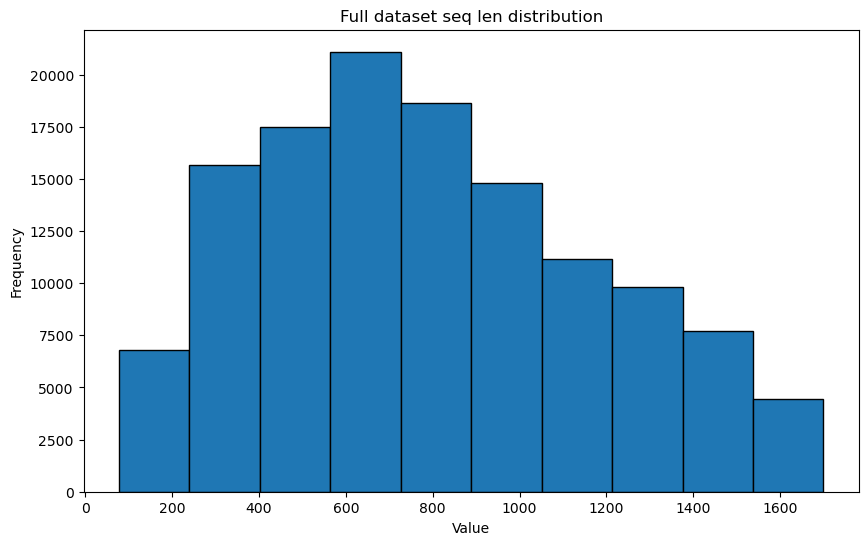

In [43]:
counts, bin_edges = (np.array([ 6782, 15670, 17506, 21099, 18622, 14810, 11181,  9831,  7730,
        4442]), np.array([  77. ,  239.3,  401.6,  563.9,  726.2,  888.5, 1050.8, 1213.1,
       1375.4, 1537.7, 1700. ]))

bin_widths = np.diff(bin_edges)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], counts, width=bin_widths, align='edge', edgecolor='black')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Full dataset seq len distribution')  # note, that seq len here is only approximated by len of string of encoded codons! (e.g. 12 23 4 2, ...)
plt.show()

## Loading ptr data file

In [3]:
with open('/export/share/krausef99dm/data/ptr_data/ptr_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
# Insights:
# - data is a dictionary with keys as gene ids
# - targets are tissue specific PTRs
# - targets_bin 1 if "up" (high-PTR), 0 if "down" (low-PTR)

**high-PTR genes**: 
1) genes having a PTR fold change compared to the average of all other tissues larger than 2
2) genes with the highest PTR among all tissues
3) genes detected in at least 3 tissues in the dataset

**low-PTR genes**: 
1) genes having a PTR fold change compared to the average of all other tissues smaller than 0.5
2) genes with the lowest PTR among all tissues
3) genes detected in at least 3 tissues in the dataset.


In [5]:
len(data.keys())

11279

In [4]:
data["ENST00000304312"].keys()

dict_keys(['fasta', 'fasta_ohe', 'bed', 'bed_annotation', 'codon_freq', 'targets', 'targets_bin'])

In [133]:
data["ENST00000229243"]

{'fasta': 'CTCTCTGCGGCTTGGCCCGTTAGAGGCGGCTTGTGTCCACGGGACGCGGGCGGATCTTCTCCGGCCATGAGGAAGCCAGCCGCTGGCTTCCTTCCCTCACTCCTGAAGGTGCTGCTCCTGCCTCTGGCACCTGCCGCAGCCCAGGATTCGACTCAGGCCTCCACTCCAGGCAGCCCTCTCTCTCCTACCGAATACGAACGCTTCTTCGCACTGCTGACTCCAACCTGGAAGGCAGAGACTACCTGCCGTCTCCGTGCAACCCACGGCTGCCGGAATCCCACACTCGTCCAGCTGGACCAATATGAAAACCACGGCTTAGTGCCCGATGGTGCTGTCTGCTCCAACCTCCCTTATGCCTCCTGGTTTGAGTCTTTCTGCCAGTTCACTCACTACCGTTGCTCCAACCACGTCTACTATGCCAAGAGAGTCCTGTGTTCCCAGCCAGTCTCTATTCTCTCACCTAACACTCTCAAGGAGATAGAAGCTTCAGCTGAAGTCTCACCCACCACGATGACCTCCCCCATCTCACCCCACTTCACAGTGACAGAACGCCAGACCTTCCAGCCCTGGCCTGAGAGGCTCAGCAACAACGTGGAAGAGCTCCTACAATCCTCCTTGTCCCTGGGAGGCCAGGAGCAAGCGCCAGAGCACAAGCAGGAGCAAGGAGTGGAGCACAGGCAGGAGCCGACACAAGAACACAAGCAGGAAGAGGGGCAGAAACAGGAAGAGCAAGAAGAGGAACAGGAAGAGGAGGGAAAGCAGGAAGAAGGACAGGGGACTAAGGAGGGACGGGAGGCTGTGTCTCAGCTGCAGACAGACTCAGAGCCCAAGTTTCACTCTGAATCTCTATCTTCTAACCCTTCCTCTTTTGCTCCCCGGGTACGAGAAGTAGAGTCTACTCCTATGATAATGGAGAACATCCAGGAGCTCATTCGATCAGCCCAGGAAATAGATGAAATGAATGAAATATATGATGAGAACTCCTACTG

In [15]:
key_iterator = iter(data.keys())

In [104]:
# checking binary targets as in Eraslan et al
idx = next(key_iterator)
print(idx)
data[idx]["targets_bin"]

ENST00000281182


array([nan, nan, nan,  0., nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan,  1., nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan])

In [148]:
np.nan_to_num(data[idx]["targets_bin"] + 1, nan=0)

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [136]:
bins = [idx for idx in data.keys() if sum(data[idx]["targets_bin"][~np.isnan(data[idx]["targets_bin"])]) > 1]

In [137]:
bins

['ENST00000358502',
 'ENST00000528099',
 'ENST00000399429',
 'ENST00000366971',
 'ENST00000530956',
 'ENST00000321027',
 'ENST00000275364',
 'ENST00000525115',
 'ENST00000312419',
 'ENST00000498165',
 'ENST00000395699',
 'ENST00000348849',
 'ENST00000409031',
 'ENST00000263904',
 'ENST00000266732',
 'ENST00000356232',
 'ENST00000332853',
 'ENST00000379416']

In [117]:
np.histogram(bins)

(array([1475,    0,    0,    0,    0, 9786,    0,    0,    0,   18]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]))

In [14]:
len(data["ENST00000012049"]["bed_annotation"])

2125

In [13]:
len(data["ENST00000012049"]["fasta_ohe"])

2125

## Simple EDA

### Sequence lengths

In [4]:
# Extract lengths of sequences
lengths = [len(data[k]["fasta_ohe"]) for k in data.keys()]
lengths_net = [len([x for x in data[k]["bed_annotation"] if x not in [3, 5]]) for k in data.keys()]

In [23]:
max_seq_thres = 8100
print("Share of mRNA seq in dataset:", len(np.where(np.array(lengths) < max_seq_thres)[0]) / len(lengths))

Share of mRNA seq in dataset: 0.9307562727192127


In [17]:
# get min index of lengths
lengths.index(min(lengths))

848

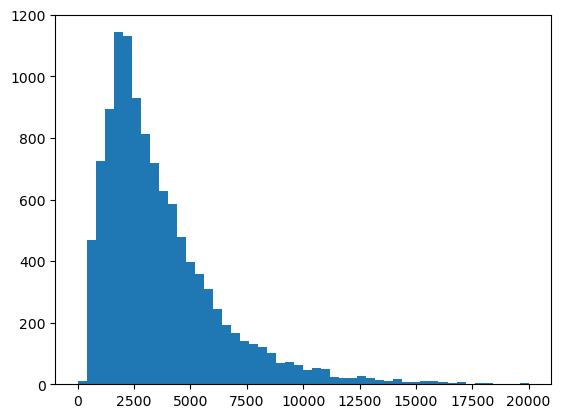

In [58]:
# Histogram of length of sequences
plt.hist(lengths, bins=50, range=(0, 20000))
plt.show()

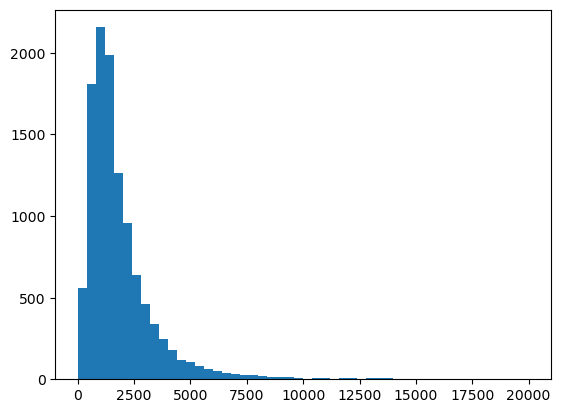

In [59]:
# Histogram of net length of sequences
plt.hist(lengths_net, bins=50, range=(0, 20000))
plt.show()

In [14]:
# Summary statistics
pd.Series(lengths).describe()

count     11279.000000
mean       3707.921181
std        2916.208030
min         303.000000
25%        1854.000000
50%        2977.000000
75%        4738.000000
max      109224.000000
dtype: float64

In [60]:
# Summary statistics
pd.Series(lengths_net).describe()

count     11279.000000
mean       1879.473801
std        2002.292441
min         114.000000
25%         894.000000
50%        1413.000000
75%        2265.000000
max      107976.000000
dtype: float64

### Target Distribution

In [8]:
targets_all = [data[k]["targets"] for k in data.keys()]
#[len(data[k]["fasta_ohe"]) for k in data.keys()]
#lengths_net = [len([x for x in data[k]["bed_annotation"] if x not in [3, 5]]) for k in data.keys()]

In [15]:
targets_flatten = np.stack(targets_all).flatten()
targets_flatten = targets_flatten[~np.isnan(targets_flatten)]

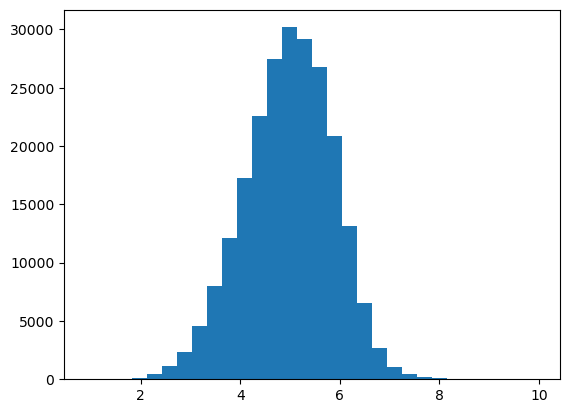

In [23]:
plt.hist(targets_flatten, bins=30)
plt.show()

## Loading bpp test data file

Containing ptr data + BPP predictions for two sequences

In [30]:
# load bpp_sample
with open('../../data/ptr_data_bpp_sample.pkl', 'rb') as f:
    ptr_bpp_samples = pickle.load(f)

In [31]:
ptr_bpp_samples.keys()

odict_keys(['ENST00000000233', 'ENST00000000412'])

In [77]:
# id = "ENST00000000233"
id = "ENST00000000412"
bpp_sample = ptr_bpp_samples[id]["bpp"]["vienna_2"]
print("Sparcity:", sum(sum(bpp_sample > 0)) / (bpp_sample.shape[0] * bpp_sample.shape[1]))
bpp_sample.shape

Sparcity: 0.09751936693044565


(2450, 2450)

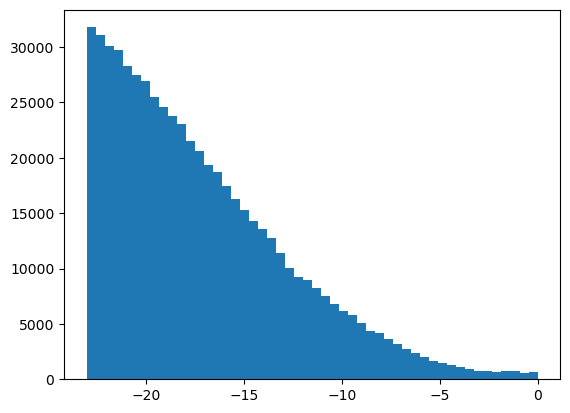

In [78]:
# histogram
bpp_values_nonzero = [x for x in bpp_sample.flatten() if x > 0]
bpp_values_nonzero_log = np.log(bpp_values_nonzero)
plt.hist(bpp_values_nonzero_log, bins=50)
plt.show()

In [79]:
pd.Series(bpp_values_nonzero_log).describe()

count    585360.000000
mean        -17.159600
std           4.540818
min         -23.025851
25%         -20.798373
50%         -18.153919
75%         -14.503443
max          -0.000187
dtype: float64

## Loading test sec_struc data file

In [24]:
with open('../../data/sec_struc/ENST00000304312-vienna_2.pkl', 'rb') as f:
    sec_struc = pickle.load(f)

In [25]:
sec_struc

{'vienna_2': {'bpp': array([[0.        , 0.        , 0.        , ..., 0.        , 0.00609191,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.0062961 , 0.        ,
          0.00024448],
         [0.        , 0.        , 0.        , ..., 0.        , 0.00014891,
          0.        ],
         ...,
         [0.        , 0.0062961 , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.00609191, 0.        , 0.00014891, ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.00024448, 0.        , ..., 0.        , 0.        ,
          0.        ]]),
  'structure': '...((((((...))))))......................((.(((..((.((..............(.((.((((.(((..(((.((((((.((((((((....).)))))))..........(((........))).....))))))))).))))))).)).).................................((((((......))))))......................)).))...)))..))..................................................',
  'loop_type': None}}

## Kidney toy example

CV-5 in paper:

mean accuracy: 0.7314

mean ROC:      0.7896

In [10]:
df = pd.DataFrame(data).T

In [11]:
df.head()

,fasta,fasta_ohe,bed,bed_annotation,codon_freq,targets,targets_bin
ENST00000263100,ATTGCTGCAGACGCTCACCCCAGACACTCACTGCACCGGAGTGAGC...,"[0, 3, 3, 2, 1, 3, 2, 1, 0, 2, 0, 1, 2, 1, 3, ...","[[ENST00000263100.8, 0, 55, 5UTR, ., +], [ENST...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.006048387096774193, 0.0020161290322580645, ...","[nan, 8.277, nan, nan, nan, nan, nan, 7.841, n...","[nan, 1.0, nan, nan, nan, nan, nan, nan, nan, ..."
ENST00000373993,ATAATCAAGGAAACCTTTTCCGGGTGGGGATCTCTGAAATTACTCA...,"[0, 3, 0, 0, 3, 1, 0, 0, 2, 2, 0, 0, 0, 1, 1, ...","[[ENST00000373993.6, 0, 92, 5UTR, ., +], [ENST...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.04201680672268908, 0.015126050420168067, 0....","[nan, nan, nan, 5.135, 5.371, nan, nan, nan, n...","[nan, nan, nan, 0.0, nan, nan, nan, nan, nan, ..."
ENST00000318602,GGGACCAGATGGATTGTAGGGAGTAGGGTACAATACAGTCTGTTCT...,"[2, 2, 2, 0, 1, 1, 0, 2, 0, 3, 2, 2, 0, 3, 3, ...","[[ENST00000318602.12, 0, 70, 5UTR, ., +], [ENS...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.02305084745762712, 0.014915254237288136, 0....","[6.29, 6.328, 5.948, 5.811, 6.068, 5.383, 5.88...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
ENST00000299698,GACCCTGGAAAAATCTGTCTCACCCACAAAGATGTGGGCTCAGCTC...,"[2, 0, 1, 1, 1, 3, 2, 2, 0, 0, 0, 0, 0, 3, 1, ...","[[ENST00000299698.12, 0, 31, 5UTR, ., +], [ENS...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.019243986254295534, 0.01443298969072165, 0....","[nan, nan, 3.995, nan, nan, nan, 4.129, nan, n...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
ENST00000401850,TGCACTTCTGTGCCTCAATTTCCTCATCTGTAGGGTGGGGGTGGTG...,"[3, 2, 1, 0, 1, 3, 3, 1, 3, 2, 3, 2, 1, 1, 3, ...","[[ENST00000401850.5, 0, 490, 5UTR, ., +], [ENS...","[5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, ...","[0.00847457627118644, 0.0, 0.00282485875706214...","[3.843, 4.601, nan, nan, nan, nan, 4.013, 3.68...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [12]:
# extract only first element of targets_bin
df["targets_bin_kidney"] = df["targets_bin"].apply(lambda x: x[11])

In [13]:
df_kidney = df[["codon_freq", 'targets_bin_kidney']]
df_kidney = df_kidney.dropna(subset=["targets_bin_kidney"])
df_kidney

,codon_freq,targets_bin_kidney
ENST00000261772,"[0.022703818369453045, 0.005159958720330237, 0...",0.0
ENST00000205557,"[0.008643617021276596, 0.006648936170212766, 0...",1.0
ENST00000525795,"[0.009478672985781991, 0.0, 0.0047393364928909...",1.0
ENST00000370841,"[0.04265402843601896, 0.02132701421800948, 0.0...",1.0
ENST00000356140,"[0.050445103857566766, 0.01483679525222552, 0....",1.0
...,...,...
ENST00000588311,"[0.06913996627318718, 0.01517706576728499, 0.0...",0.0
ENST00000307771,"[0.041407867494824016, 0.026915113871635612, 0...",0.0
ENST00000439158,"[0.036855036855036855, 0.03194103194103194, 0....",1.0
ENST00000200135,"[0.041025641025641026, 0.016666666666666666, 0...",0.0


In [94]:
# Store kidney example
# df_kidney.to_pickle('../../data/kidney_example.pkl')

In [31]:
# CHECKPOINT
# Load kidney example
# df_kidney = pd.read_csv('../../data/kidney_example.csv', index_col=0)
df_kidney = pd.read_pickle('../../data/kidney_example.pkl')

In [14]:
x = np.array(df_kidney["codon_freq"].tolist())
y = np.array(df_kidney["targets_bin_kidney"].tolist())

In [32]:
x

array([[0.02270382, 0.00515996, 0.02786378, ..., 0.00825593, 0.00825593,
        0.02167183],
       [0.00864362, 0.00664894, 0.01130319, ..., 0.00930851, 0.00864362,
        0.01396277],
       [0.00947867, 0.        , 0.00473934, ..., 0.        , 0.00473934,
        0.00947867],
       ...,
       [0.03685504, 0.03194103, 0.06879607, ..., 0.02211302, 0.004914  ,
        0.01474201],
       [0.04102564, 0.01666667, 0.05641026, ..., 0.02820513, 0.01153846,
        0.02051282],
       [0.03761062, 0.02212389, 0.06747788, ..., 0.01548673, 0.0210177 ,
        0.01769912]])

In [31]:
len(x) * 0.7

593.5999999999999

In [18]:
# Try MLP
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

clf = MLPClassifier(random_state=42, max_iter=1000)
cv_scores = cross_validate(clf, x, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)
cv_scores

/export/share/krausef99dm/miniforge3/envs/master-env/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'fit_time': array([3.75426722, 3.71201229, 2.5234673 , 5.00319815, 5.81993818]),
 'score_time': array([0.00641227, 0.00420523, 0.00551105, 0.00619888, 0.00571704]),
 'test_accuracy': array([0.68823529, 0.67647059, 0.74117647, 0.71597633, 0.71597633]),
 'train_accuracy': array([0.78171091, 0.76696165, 0.75663717, 0.78939617, 0.77466863]),
 'test_roc_auc': array([0.75692137, 0.75653979, 0.79128028, 0.79593838, 0.7662465 ]),
 'train_roc_auc': array([0.86364427, 0.84947397, 0.85216287, 0.87645977, 0.8667945 ])}

In [19]:
# mean and std of accuracy
print(f"Mean accuracy: {cv_scores['test_accuracy'].mean()}")
print(f"Std accuracy: {cv_scores['test_accuracy'].std()}")

Mean accuracy: 0.707567003132614
Std accuracy: 0.02285489837238287


In [20]:
# mean and std of ROC
print(f"Mean ROC: {cv_scores['test_roc_auc'].mean()}")
print(f"Std ROC: {cv_scores['test_roc_auc'].std()}")

Mean ROC: 0.773385263270835
Std ROC: 0.016939102106242044


In [21]:
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=42)
cv_scores = cross_validate(clf, x, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)
cv_scores

{'fit_time': array([0.21466231, 0.20948768, 0.20733571, 0.20783114, 0.20757008]),
 'score_time': array([0.01433349, 0.01265955, 0.01252437, 0.01246428, 0.01248884]),
 'test_accuracy': array([0.68823529, 0.72352941, 0.71764706, 0.75739645, 0.72189349]),
 'train_accuracy': array([0.75663717, 0.74926254, 0.74926254, 0.73932253, 0.74963181]),
 'test_roc_auc': array([0.76785714, 0.77605536, 0.78242215, 0.81568627, 0.79187675]),
 'train_roc_auc': array([0.83018187, 0.82743197, 0.83093885, 0.82155686, 0.82829391])}

In [22]:
# mean and std of accuracy
print(f"Mean accuracy: {cv_scores['test_accuracy'].mean()}")
print(f"Std accuracy: {cv_scores['test_accuracy'].std()}")

Mean accuracy: 0.7217403411068569
Std accuracy: 0.021972371026578615


In [26]:
# mean and std of ROC
print(f"Mean ROC: {cv_scores['test_roc_auc'].mean()}")
print(f"Std ROC: {cv_scores['test_roc_auc'].std()}")

Mean ROC: 0.7724701820536696
Std ROC: 0.022426286049961032


In [24]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
cv_scores = cross_validate(clf, x, y, cv=5, scoring=['accuracy', 'roc_auc'], return_train_score=True)
cv_scores

{'fit_time': array([0.02985144, 0.00559044, 0.00564003, 0.00646281, 0.00502849]),
 'score_time': array([0.00635028, 0.0045979 , 0.00510359, 0.00486922, 0.00483012]),
 'test_accuracy': array([0.68823529, 0.70588235, 0.68823529, 0.72189349, 0.71005917]),
 'train_accuracy': array([0.71091445, 0.7020649 , 0.71386431, 0.69955817, 0.70544919]),
 'test_roc_auc': array([0.74723145, 0.74878893, 0.78117647, 0.80728291, 0.77787115]),
 'train_roc_auc': array([0.78489384, 0.78031971, 0.77615148, 0.76858006, 0.77560777])}

In [25]:
# mean and std of accuracy
print(f"Mean accuracy: {cv_scores['test_accuracy'].mean()}")
print(f"Std accuracy: {cv_scores['test_accuracy'].std()}")

Mean accuracy: 0.7028611207796728
Std accuracy: 0.013046076125643498


In [27]:
# mean and std of ROC
print(f"Mean ROC: {cv_scores['test_roc_auc'].mean()}")
print(f"Std ROC: {cv_scores['test_roc_auc'].std()}")

Mean ROC: 0.7724701820536696
Std ROC: 0.022426286049961032


## Try around with padding

In [24]:
import torch
import numpy as np

In [49]:
# tensor of size 10 x 3 x 5
xs = []
for i in range(10):
    x = torch.randint(0, 10, (np.random.randint(5, 13, 1)[0], 3))
    xs.append(x)

In [54]:
lengths = torch.tensor([x.size(0) for x in xs])

In [52]:
xs_padded = torch.nn.utils.rnn.pad_sequence(xs, batch_first=True)
xs_padded

tensor([[[2, 9, 0],
         [0, 8, 2],
         [5, 8, 2],
         [2, 5, 0],
         [6, 3, 2],
         [9, 5, 6],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],

        [[8, 0, 0],
         [1, 5, 7],
         [6, 7, 6],
         [9, 2, 5],
         [4, 0, 8],
         [1, 4, 3],
         [2, 4, 8],
         [0, 9, 7],
         [9, 5, 0],
         [4, 1, 5],
         [1, 1, 7],
         [0, 0, 0]],

        [[0, 2, 5],
         [4, 9, 4],
         [5, 2, 2],
         [3, 5, 1],
         [2, 7, 3],
         [8, 3, 4],
         [4, 5, 4],
         [7, 4, 8],
         [7, 8, 8],
         [4, 7, 3],
         [0, 0, 0],
         [0, 0, 0]],

        [[7, 0, 7],
         [5, 0, 7],
         [5, 6, 4],
         [4, 0, 1],
         [4, 7, 8],
         [9, 4, 5],
         [8, 0, 0],
         [7, 8, 2],
         [6, 3, 2],
         [1, 9, 1],
         [4, 0, 2],
         [0, 0, 0]],

        [[1, 0, 3],
         [8,

In [55]:
xs_packed = torch.nn.utils.rnn.pack_padded_sequence(xs_padded, lengths, batch_first=True, enforce_sorted=False)

In [56]:
xs_packed

PackedSequence(data=tensor([[8, 0, 2],
        [8, 0, 0],
        [7, 0, 7],
        [0, 2, 5],
        [1, 0, 3],
        [8, 6, 3],
        [2, 9, 0],
        [8, 8, 4],
        [3, 0, 3],
        [3, 8, 6],
        [4, 0, 5],
        [1, 5, 7],
        [5, 0, 7],
        [4, 9, 4],
        [8, 0, 7],
        [0, 1, 5],
        [0, 8, 2],
        [4, 2, 4],
        [9, 8, 4],
        [6, 2, 6],
        [9, 6, 6],
        [6, 7, 6],
        [5, 6, 4],
        [5, 2, 2],
        [6, 8, 1],
        [1, 3, 8],
        [5, 8, 2],
        [1, 8, 0],
        [5, 0, 3],
        [8, 9, 4],
        [6, 3, 6],
        [9, 2, 5],
        [4, 0, 1],
        [3, 5, 1],
        [9, 9, 7],
        [1, 6, 3],
        [2, 5, 0],
        [1, 5, 8],
        [4, 5, 5],
        [1, 9, 3],
        [3, 4, 2],
        [4, 0, 8],
        [4, 7, 8],
        [2, 7, 3],
        [1, 3, 2],
        [6, 9, 6],
        [6, 3, 2],
        [4, 3, 6],
        [4, 1, 5],
        [0, 5, 5],
        [9, 4, 1],
        [1,

In [12]:
torch.nn.utils.rnn.pad_packed_sequence(x)

AttributeError: 'Tensor' object has no attribute 'batch_sizes'

In [57]:
import torch
import torch.nn.functional as F

# Assuming your tensor is of shape (32, 980, 32)
tensor = torch.randn(32, 980, 32)

# Define the max sequence length
max_seq_length = 1000  # for example

# Calculate the padding required
padding_size = max_seq_length - tensor.size(1)

# Apply padding along the second dimension (left and right padding as (0, 0, 0, padding_size))
if padding_size > 0:
    padded_tensor = F.pad(tensor, (0, 0, 0, padding_size), mode='constant', value=0)
else:
    padded_tensor = tensor  # No padding needed if max_seq_length <= 980

print(padded_tensor.shape)  # Should be (32, max_seq_length, 32)


torch.Size([32, 1000, 32])


In [58]:
tensor.shape

torch.Size([32, 980, 32])